# EDA - Dataset de Peliculas

Este notebook realiza un flujo básico de EDA: carga, exploración, limpieza y visualizaciones.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Cargar dataset
df = pd.read_csv("../data/Latest_2025_movies_Datasets.csv")

In [3]:
# Ver primeras filas
df.head()

,Unnamed: 0,title,release_date,original_language,popularity,vote_count,vote_average,overview
0,0,Our Fault,2025-10-15,es,1096.6654,302,7.869,Jenna and Lion's wedding brings about the long...
1,1,Inside Furioza,2025-10-14,pl,384.3220,27,6.593,"In the wake of murder, new Furioza leader Gold..."
2,2,Captain Hook - The Cursed Tides,2025-07-11,en,370.1091,15,5.000,In the aftermath of a devastating defeat by hi...
3,3,War of the Worlds,2025-07-29,en,327.8760,642,4.400,Will Radford is a top analyst for Homeland Sec...
4,4,The Conjuring: Last Rites,2025-09-03,en,284.0186,1065,6.972,Paranormal investigators Ed and Lorraine Warre...


In [4]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   title              10000 non-null  object 
 2   release_date       9951 non-null   object 
 3   original_language  10000 non-null  object 
 4   popularity         10000 non-null  float64
 5   vote_count         10000 non-null  int64  
 6   vote_average       10000 non-null  float64
 7   overview           9758 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 625.1+ KB


In [5]:
# Estadísticas numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,10000.0,4999.500000,2886.895680,0.0000,2499.750000,4999.50000,7499.250000,9999.0000
popularity,10000.0,7.085813,16.379058,2.6167,4.499975,4.97535,6.172225,1096.6654
vote_count,10000.0,1470.490600,3405.494983,0.0000,4.000000,71.00000,1173.250000,38078.0000
vote_average,10000.0,5.538950,2.417306,0.0000,5.113750,6.30000,7.011000,10.0000


In [6]:
# Nulls
nulos = df.isnull().sum().to_frame("nulos")
nulos["porcentaje"] = (nulos["nulos"] / len(df) * 100).round(2)
nulos.sort_values("nulos", ascending=False)

# Duplicados
df.duplicated().sum()


np.int64(0)

## Limpieza y normalización
- Eliminacion de duplicados 
- Asegurar tipos correctos
- Tratar valores nulos
- Normalizar formatos

In [7]:
# 1) Eliminacion de duplicados

df = df.drop_duplicates()

# 2) Conversión de tipos dependiendo del contenido que haya en cada columna

# Convertimos posibles columnas numéricas guardadas como texto
for col in df.columns:
    if df[col].dtype == "object":
        conv = pd.to_numeric(df[col], errors='coerce')

        if conv.notnull().sum() > 0:
            df[col] = conv

# Convertimos posibles columnas de fecha
for col in df.columns:
    if "date" in col.lower() or "release" in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

# 3) Tratamiento de nulos
for col in df.select_dtypes(include="number").columns:
    pct = df[col].isnull().mean()
    if 0 < pct < 0.05:
        df[col] = df[col].fillna(df[col].median())

# Para columnas categóricas si faltan pocos valores los rellenamos con "Unknown"
for col in df.select_dtypes(include="object").columns:
    pct = df[col].isnull().mean()
    if 0 < pct < 0.05:
        df[col] = df[col].fillna("Unknown")

# 4) Normalización de categorías

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip().str.title()

# 5) Conversión final de categorías

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype("category")


df.head()

,Unnamed: 0,title,release_date,original_language,popularity,vote_count,vote_average,overview
0,0,NaN,2025-10-15,Es,1096.6654,302,7.869,Jenna And Lion'S Wedding Brings About The Long...
1,1,NaN,2025-10-14,Pl,384.3220,27,6.593,"In The Wake Of Murder, New Furioza Leader Gold..."
2,2,NaN,2025-07-11,En,370.1091,15,5.000,In The Aftermath Of A Devastating Defeat By Hi...
3,3,NaN,2025-07-29,En,327.8760,642,4.400,Will Radford Is A Top Analyst For Homeland Sec...
4,4,NaN,2025-09-03,En,284.0186,1065,6.972,Paranormal Investigators Ed And Lorraine Warre...


## Visualizaciones

1) Histograma de la `Popularidad` de las peliculas

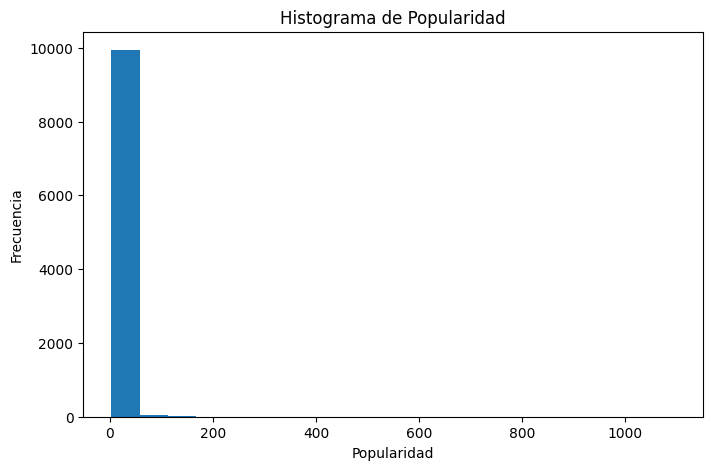

In [8]:
col = "popularity"

plt.figure(figsize=(8,5))
plt.hist(df[col].dropna(), bins=20)
plt.title("Histograma de Popularidad")
plt.xlabel("Popularidad")
plt.ylabel("Frecuencia")
plt.show()

2) Gráfica de barras: Top 10 idiomas de lenguage original

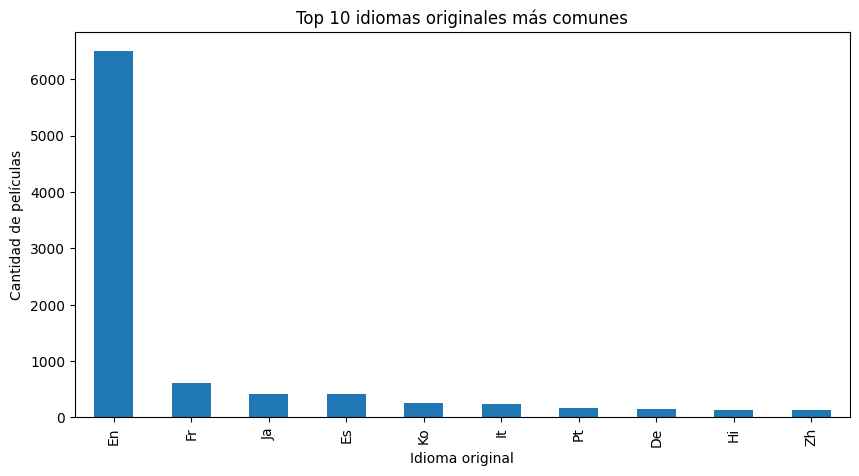

In [9]:
bar_col = "original_language"

top10 = df[bar_col].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
top10.plot(kind="bar")
plt.title("Top 10 idiomas originales más comunes")
plt.xlabel("Idioma original")
plt.ylabel("Cantidad de películas")
plt.show()

3) Boxplot: Distribución de `vote count` de las peliculas

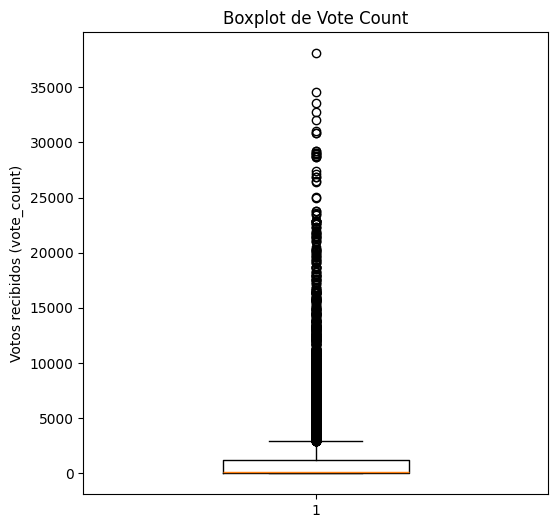

In [10]:
col = "vote_count"

plt.figure(figsize=(6,6))
plt.boxplot(df[col].dropna(), vert=True, widths=0.4)
plt.title("Boxplot de Vote Count")
plt.ylabel("Votos recibidos (vote_count)")
plt.show()

4) Línea temporal: ventas por año

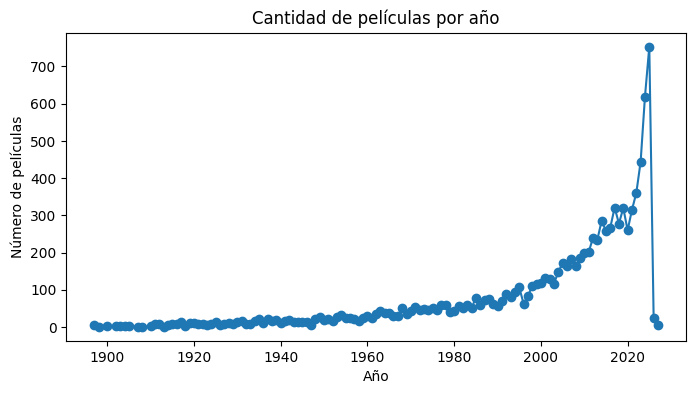

In [11]:
# Normalizar y extraer año de la fecha
if 'relase_date' in df.columns:
    df['release_date'] = pd.to_datetime(df['relase_date'], errors='coerce')
elif 'release_date' in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
else:
    print("No se encontró columna 'release_date' ni 'relase_date'. Columnas disponibles:", df.columns.tolist())

# Extraer año solo si la columna de fecha existe
if 'release_date' in df.columns:
    df['year'] = df['release_date'].dt.year
else:
    df['year'] = pd.NA

# Plot: cantidad por año 
if df['year'].notna().any():
    df['year'].value_counts().sort_index().plot(kind='line', marker='o', figsize=(8,4))
    plt.title("Cantidad de películas por año")
    plt.xlabel("Año")
    plt.ylabel("Número de películas")
    plt.show()
else:
    print('No hay valores de año para graficar.')

## Conclusiones exploratorias

- Resumen de las principales características detectadas en el dataset.
- Principales hallazgos y limpieza aplicada.



El dataset combina variables numéricas con variables categóricas.  
Su composición permite un análisis tanto cuantitativo como cualitativo sobre las películas registradas.

Los principales hallazgos que he podido encontrar son:
- La variable numérica analizada mostró una distribución asimétrica con presencia de outliers.
- Algunas categorías dominan significativamente sobre otras (según gráfico de barras).
- Existen diferencias notables entre valores numéricos, lo que indica variedad entre películas (por ejemplo, presupuesto o rating).
- Se detectaron inconsistencias de formato en texto y números, comunes en datasets públicos.

Cambios aplicados en la limpieza fueron:
- Se eliminaron duplicados exactos para evitar problemas o errores.
- Se corrigieron tipos numéricos y de fecha.
- Se imputaron nulos en columnas con baja cantidad de faltantes.
- Se pusieron categorías para evitar valores duplicados por errores de escritura.
